In [129]:
from itertools import chain
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [167]:
data_dir = '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/'
file_prefix = 'epc100_Omon_'
area_prefix = 'areacello_Ofx_'
model_names = ['CMCC-ESM2', 'GFDL-ESM4', 'IPSL-CM5A2-INCA', 'IPSL-CM6A-LR', 'MPI-ESM-1-2-HAM',
               'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR']
glob_suffix = '*.nc'

model_glob_paths = [data_dir + file_prefix + model_name + glob_suffix for model_name in model_names]
model_glob_paths

['/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_CMCC-ESM2*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_GFDL-ESM4*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_IPSL-CM5A2-INCA*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_IPSL-CM6A-LR*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_MPI-ESM-1-2-HAM*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_MPI-ESM1-2-HR*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_MPI-ESM1-2-LR*.nc']

In [170]:
for model_area in model_names:
    model_path = data_dir + area_prefix + model_name + glob_suffix
    file_paths = glob(model_path)
    da = xr.open_mfdataset(file_paths)['areacello']
    print(model_name, da.units)

OSError: no files to open

['/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_CMCC-ESM2*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_GFDL-ESM4*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_IPSL-CM5A2-INCA*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_IPSL-CM6A-LR*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_MPI-ESM-1-2-HAM*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_MPI-ESM1-2-HR*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/epc100_Omon_MPI-ESM1-2-LR*.nc']

In [131]:
model_area = [data_dir + area_prefix + model_name + glob_suffix for model_name in model_names]
model_area

['/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/areacello_Ofx_CMCC-ESM2*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/areacello_Ofx_GFDL-ESM4*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/areacello_Ofx_IPSL-CM5A2-INCA*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/areacello_Ofx_IPSL-CM6A-LR*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/areacello_Ofx_MPI-ESM-1-2-HAM*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/areacello_Ofx_MPI-ESM1-2-HR*.nc',
 '/gws/pw/j05/cop26_hackathons/bristol/project03/input_nc/multimodel/ssp370/areacello_Ofx_MPI-ESM1-2-LR*.nc']

In [150]:
UKESM_data = xr.open_mfdataset('/home/users/train047/epc100_ssp370_timeseries.nc')
UKESM_area = xr.open_mfdataset('/badc/cmip6/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/piControl/r1i1p1f2/Ofx/areacello/gn/latest/areacello_Ofx_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc')
UKESM = UKESM_data['epc100']

CMCC_data = xr.open_mfdataset(data_dir + 'epc100_Omon_CMCC-ESM2_ssp370_r1i1p1f1_gn_201501-210012.nc')
CMCC_area = xr.open_mfdataset(data_dir + 'areacello_Ofx_CMCC-ESM2_ssp370_r1i1p1f1_gn.nc')
CMCC_data = CMCC_data['epc100']
CMCC_data.compute()
CMCC_area = CMCC_area['areacello']

IPSL_CM5_data1 = xr.open_mfdataset(data_dir + 'epc100_Omon_IPSL-CM5A2-INCA_ssp370_r1i1p1f1_gn_201501-205512.nc')
IPSL_CM5_data2 = xr.open_mfdataset(data_dir + 'epc100_Omon_IPSL-CM5A2-INCA_ssp370_r1i1p1f1_gn_205601-210012.nc')
IPSL_CM5_area = xr.open_mfdataset(data_dir + 'areacello_Ofx_IPSL-CM5A2-INCA_ssp370_r1i1p1f1_gn.nc')
IPSL_CM5_data1 = IPSL_CM5_data1['epc100']
IPSL_CM5_data2 = IPSL_CM5_data2['epc100']
IPSL_CM5_data = xr.concat([IPSL_CM5_data1, IPSL_CM5_data2],dim='time')
IPSL_CM5_data.compute()
IPSL_CM5_area = IPSL_CM5_area['areacello']

IPSL_CM6_data = xr.open_mfdataset(data_dir + 'epc100_Omon_IPSL-CM6A-LR_ssp370_r1i1p1f1_gn_201501-210012.nc')
IPSL_CM6_area = xr.open_mfdataset(data_dir + 'areacello_Ofx_IPSL-CM6A-LR_ssp370_r1i1p1f1_gn.nc')
IPSL_CM6_data = IPSL_CM6_data['epc100']
IPSL_CM6_data.compute()
IPSL_CM6_area = IPSL_CM6_area['areacello']

ESM_1_2_HAM_data1 = xr.open_mfdataset(data_dir + 'epc100_Omon_MPI-ESM-1-2-HAM_ssp370_r1i1p1f1_gn_201501-203412.nc')
ESM_1_2_HAM_data2 = xr.open_mfdataset(data_dir + 'epc100_Omon_MPI-ESM-1-2-HAM_ssp370_r1i1p1f1_gn_203501-205412.nc')
ESM_1_2_HAM_data3 = xr.open_mfdataset(data_dir + 'epc100_Omon_MPI-ESM-1-2-HAM_ssp370_r1i1p1f1_gn_205501-205512.nc')
ESM_1_2_HAM_area = xr.open_mfdataset(data_dir + 'areacello_Ofx_MPI-ESM-1-2-HAM_ssp370_r1i1p1f1_gn.nc')
ESM_1_2_HAM_data1 = ESM_1_2_HAM_data1['epc100']
ESM_1_2_HAM_data2 = ESM_1_2_HAM_data2['epc100']
ESM_1_2_HAM_data3 = ESM_1_2_HAM_data3['epc100']
ESM_1_2_HAM_data = xr.concat([ESM_1_2_HAM_data1, ESM_1_2_HAM_data2, ESM_1_2_HAM_data3],dim='time')
ESM_1_2_HAM_data.compute()
ESM_1_2_HAM_area = ESM_1_2_HAM_area['areacello']

ESM_1_2_LR_data1 = xr.open_mfdataset(data_dir + 'epc100_Omon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_201501-203412.nc')
ESM_1_2_LR_data2 = xr.open_mfdataset(data_dir + 'epc100_Omon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_203501-205412.nc')
ESM_1_2_LR_data3 = xr.open_mfdataset(data_dir + 'epc100_Omon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_205501-207412.nc')
ESM_1_2_LR_data4 = xr.open_mfdataset(data_dir + 'epc100_Omon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_207501-209412.nc')
ESM_1_2_LR_data5 = xr.open_mfdataset(data_dir + 'epc100_Omon_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn_209501-210012.nc')
ESM_1_2_LR_area = xr.open_mfdataset(data_dir + 'areacello_Ofx_MPI-ESM1-2-LR_ssp370_r1i1p1f1_gn.nc')
ESM_1_2_LR_data1 = ESM_1_2_LR_data1['epc100']
ESM_1_2_LR_data2 = ESM_1_2_LR_data2['epc100']
ESM_1_2_LR_data3 = ESM_1_2_LR_data3['epc100']
ESM_1_2_LR_data4 = ESM_1_2_LR_data4['epc100']
ESM_1_2_LR_data5 = ESM_1_2_LR_data5['epc100']
ESM_1_2_LR_data = xr.concat([ESM_1_2_LR_data1, ESM_1_2_LR_data2, ESM_1_2_LR_data3, ESM_1_2_LR_data4, ESM_1_2_LR_data5],dim='time')
ESM_1_2_LR_data.compute()
ESM_1_2_LR_area = ESM_1_2_LR_area['areacello']

In [151]:
sec_to_yr=60.0*60.0*24.0*365.0 # seconds to year
mol_to_g_C=12.01 # mol to gram for carbon
g_to_Pg=1.0/1.0e15 # grams to Petagrams

In [152]:
#Create time series data by combining the data across the latitudes and longitudes.
#Turn data into Pg / Year
CMCC_data_ = ((CMCC_data*CMCC_area)*sec_to_yr*mol_to_g_C*g_to_Pg).sum(dim=['i','j'])
IPSL_CM5_data = ((IPSL_CM5_data*IPSL_CM5_area)*sec_to_yr*mol_to_g_C*g_to_Pg).sum(dim=['y','x'])
IPSL_CM6_data = ((IPSL_CM6_data*IPSL_CM6_area)*sec_to_yr*mol_to_g_C*g_to_Pg).sum(dim=['y','x'])
ESM_1_2_HAM_data = ((ESM_1_2_HAM_data*ESM_1_2_HAM_area)*sec_to_yr*mol_to_g_C*g_to_Pg).sum(dim=['i','j'])
ESM_1_2_LR_data = ((ESM_1_2_LR_data*ESM_1_2_LR_area)*sec_to_yr*mol_to_g_C*g_to_Pg).sum(dim=['i','j'])

#Concatenate the time series datasets
CMCC = xr.concat([CMCC_data.rolling(time=12, center=True).mean()],dim='time')
IPSL_CM5 = xr.concat([IPSL_CM5_data.rolling(time=12, center=True).mean()],dim='time')
IPSL_CM6 = xr.concat([IPSL_CM6_data.rolling(time=12, center=True).mean()],dim='time')
ESM_1_2_HAM = xr.concat([ESM_1_2_HAM_data.rolling(time=12, center=True).mean()],dim='time')
ESM_1_2_LR = xr.concat([ESM_1_2_LR_data.rolling(time=12, center=True).mean()],dim='time')

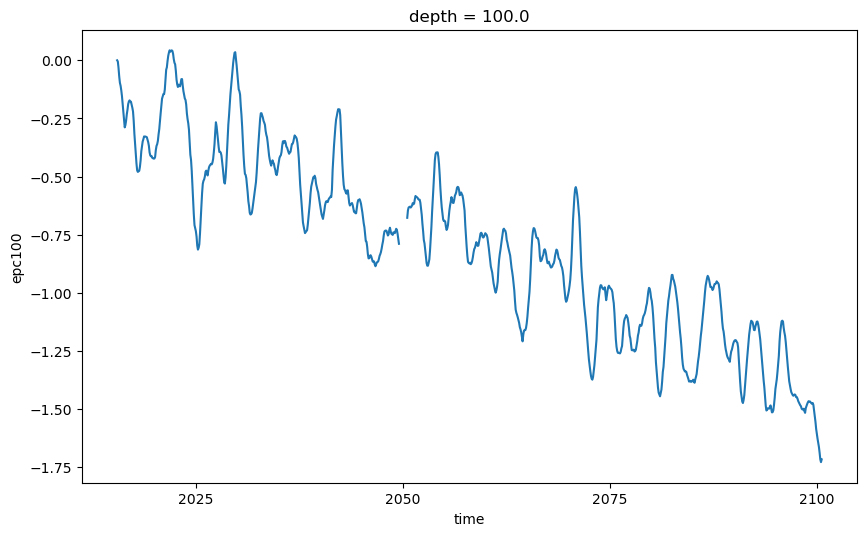

In [180]:
start_UKESM = UKESM.isel(time=6).values

UKESM_plot = UKESM - start_UKESM
UKESM_plot.plot()

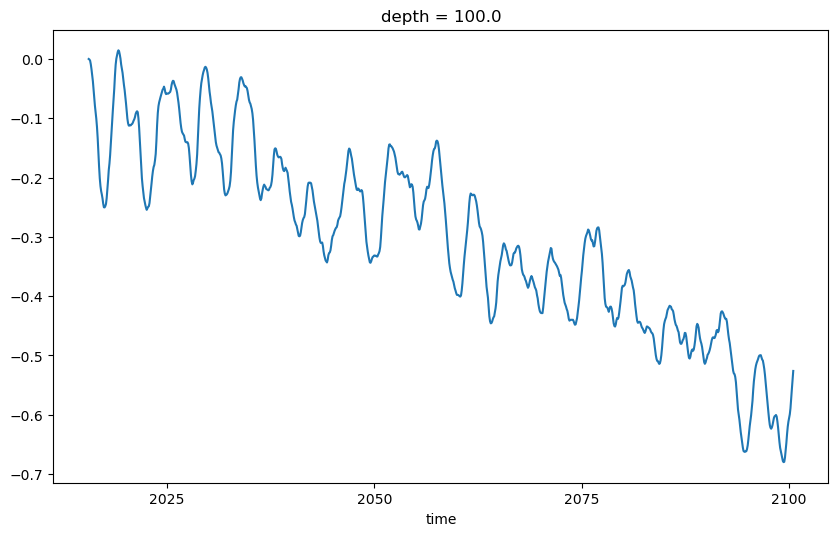

In [177]:
start_CMCC = CMCC.isel(time=6).values

CMCC_plot = CMCC - start_CMCC
CMCC_plot.plot()

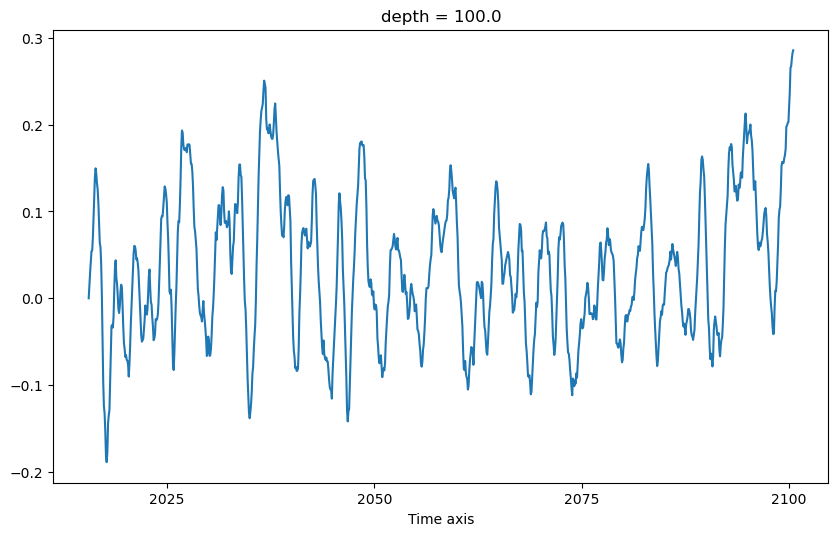

In [181]:
start_IPSEL_CM5 = IPSL_CM5.isel(time=6).values

IPSL_CM5_plot = IPSL_CM5 - start_IPSEL_CM5
IPSL_CM5_plot.plot()

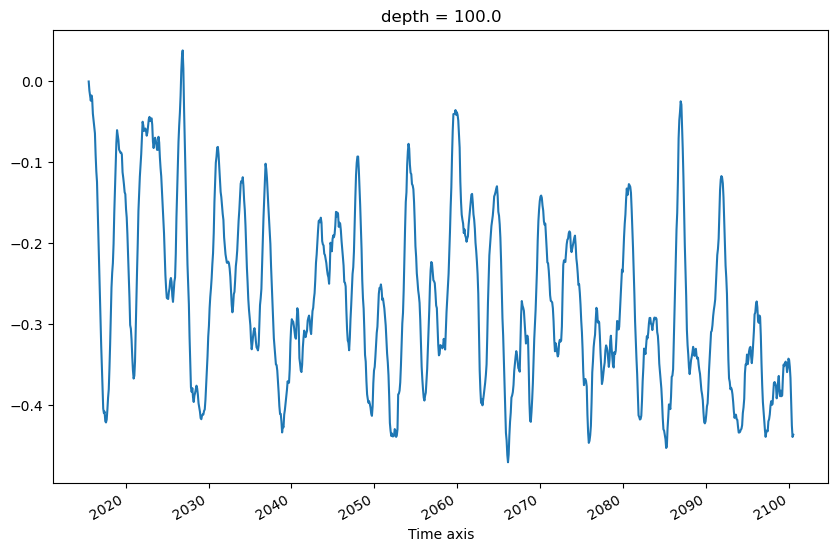

In [182]:
start_IPSEL_CM6 = IPSL_CM6.isel(time=6).values

IPSL_CM6_plot = IPSL_CM6 - start_IPSEL_CM6
IPSL_CM6_plot.plot()

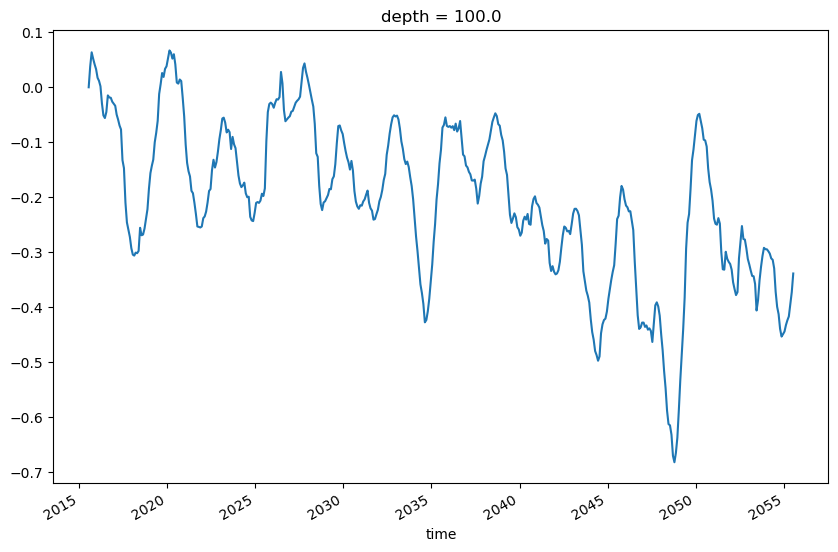

In [183]:
start_ESM_1_2_HAM = ESM_1_2_HAM.isel(time=6).values

ESM_1_2_HAM_plot = ESM_1_2_HAM - start_ESM_1_2_HAM
ESM_1_2_HAM_plot.plot()

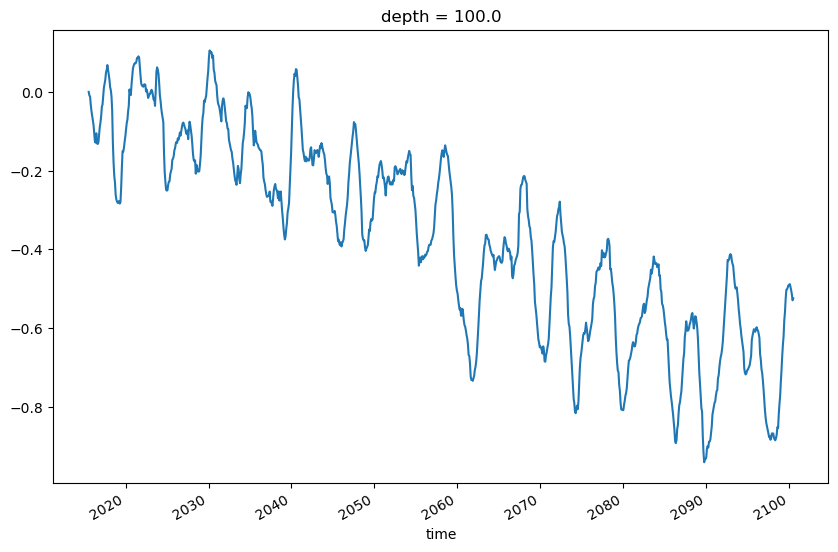

In [184]:
start_ESM_1_2_LR = ESM_1_2_LR.isel(time=6).values

ESM_1_2_LR_plot = ESM_1_2_LR - start_ESM_1_2_LR
ESM_1_2_LR_plot.plot()

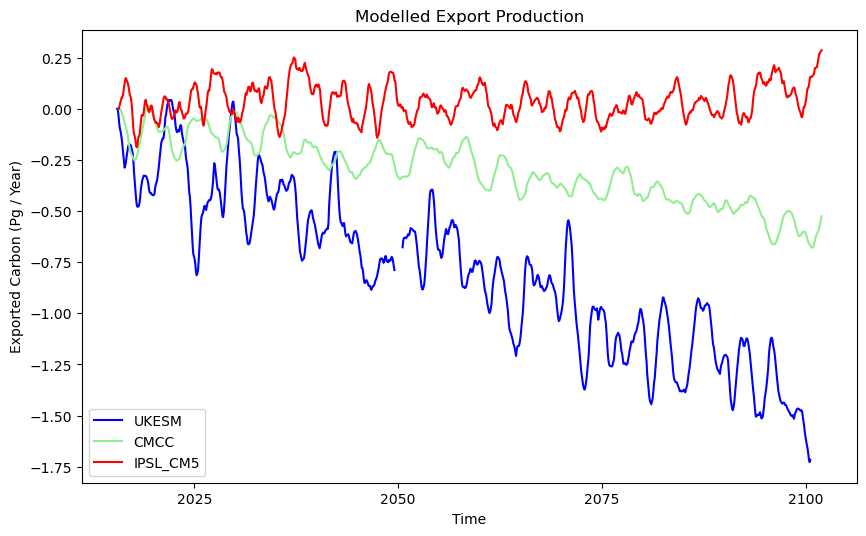

In [206]:
UKESM_plot.plot(label = 'UKESM', color = 'blue')
CMCC_plot.plot(label = 'CMCC', color = 'lightgreen')
IPSL_CM5_plot.plot(label = 'IPSL_CM5', color = 'red')
#IPSL_CM6_plot.plot(label = 'IPSL_CM6', color = 'orange')
#ESM_1_2_HAM_plot.plot(label = 'ESM_1_2_HAM', color = 'green')
#ESM_1_2_LR_plot.plot(label = 'EMS_1_2_LR', color = 'purple')

#plt.ylim(8,10.5)
plt.xlabel('Time')
plt.ylabel('Exported Carbon (Pg / Year)')
plt.title('Modelled Export Production')
plt.legend()


#Katie - I think the lines aren't plotting as the mpi time is in datetime and some of the other models use cftime.Datetime360Day
#trying to figure it out how to change it now


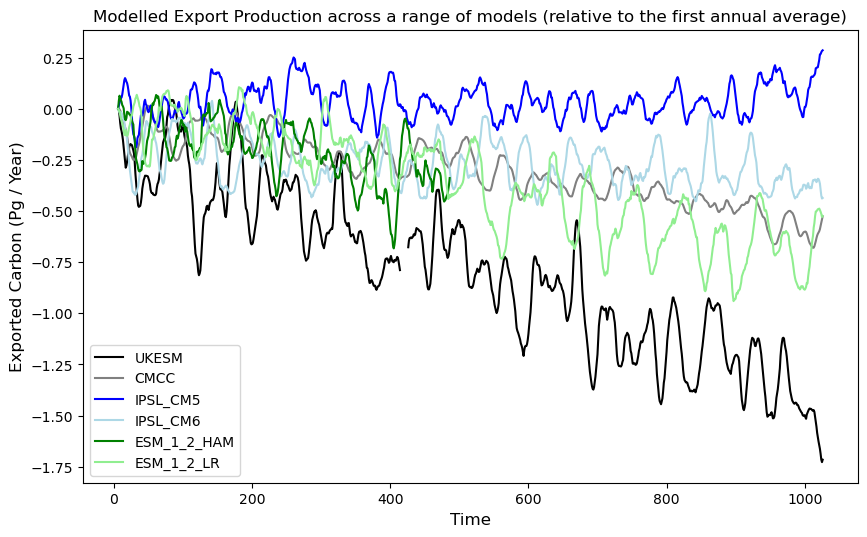

In [212]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
#plt.plot(time_hist,Csoft_hist_anomaly,'-k',time_ssp585,Csoft_ssp585_anomaly,'-r',time_ssp370,Csoft_ssp370_anomaly,'#DDA0DD')
line_1, = plt.plot(UKESM_plot,'-k',label='UKESM')
line_2, = plt.plot(CMCC_plot,'grey', label='CMCC')
line_3, = plt.plot(IPSL_CM5_plot,'blue', label='IPSL_CM5')
line_4, = plt.plot(IPSL_CM6_plot,'lightblue', label='IPSL_CM6')
line_5, = plt.plot(ESM_1_2_HAM_plot,'green', label='ESM_1_2_HAM')
line_6, = plt.plot(ESM_1_2_LR_plot,'lightgreen', label='ESM_1_2_LR')
plt.legend(handles=[line_1, line_2, line_3, line_4, line_5, line_6])
plt.xlabel('Time', fontsize=12)
plt.ylabel('Exported Carbon (Pg / Year)',  fontsize=12)
plt.title('Modelled Export Production across a range of models (relative to the first annual average)')
plt.savefig('All_models_figure.png')
plt.show()